# Projecting Population Density

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lunvy7jn because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# population data
df_pop = pd.read_csv('~/cpt5/capstone/data/processed/'
                     'regional_projection_2010_2030.csv')

In [3]:
df_pop.drop(columns='Unnamed: 0', inplace=True)

In [4]:
df_pop.set_index('year', inplace=True)

In [5]:
df_pop.head()

,Philippines,NCR,CAR,I - Ilocos,II - Cagayan,III - C. Luzon,IVA - Calabarzon,MIMAROPA,V - Bicol,VI - W. Visayas,VII - C. Visayas,VIII - E. Visayas,IX - Zamboanga,X - N. Mindanao,XI - Davao,XII - SOCCSKSARGEN,XIII - Caraga,BARMM
year,,,,,,,,,,,,,,,,,,
2010,92337852.0,11855975.0,1616867.0,4748372.0,3229163.0,10137737.0,12609803.0,2744671.0,5420411.0,7102438.0,6800180.0,4101322.0,3407353.0,4297323.0,4468563.0,4109571.0,2429224.0,3256140.0
2011,94036955.8,12056622.2,1637520.4,4802931.8,3272824.0,10350003.4,12965281.6,2787635.0,5494390.2,7187679.6,6917412.8,4167888.0,3451048.4,4374333.2,4552012.0,4195172.4,2462126.8,3359882.8
2012,95736059.6,12257269.4,1658173.8,4857491.6,3316485.0,10562269.8,13320760.2,2830599.0,5568369.4,7272921.2,7034645.6,4234454.0,3494743.8,4451343.4,4635461.0,4280773.8,2495029.6,3463625.6
2013,97435163.4,12457916.6,1678827.2,4912051.4,3360146.0,10774536.2,13676238.8,2873563.0,5642348.6,7358162.8,7151878.4,4301020.0,3538439.2,4528353.6,4718910.0,4366375.2,2527932.4,3567368.4
2014,99134267.2,12658563.8,1699480.6,4966611.2,3403807.0,10986802.6,14031717.4,2916527.0,5716327.8,7443404.4,7269111.2,4367586.0,3582134.6,4605363.8,4802359.0,4451976.6,2560835.2,3671111.2


In [6]:
region_list= df_pop.columns[1:]

In [7]:
df_pop = df_pop.reset_index()
df_population = pd.melt(df_pop, id_vars='year', value_vars=region_list)
df_population.rename(columns={'variable':'Region', 'value':'population'}
                   ,inplace=True)
df_population['population'] = df_population['population'].astype(int)
df_population.tail()

,year,Region,population
352,2026,BARMM,5293197
353,2027,BARMM,5363601
354,2028,BARMM,5434584
355,2029,BARMM,5506197
356,2030,BARMM,5578399


# Compute population density

In [8]:
regions=df_population.Region.unique()

In [9]:
# square kilometers land area
ncr = 619.54
car = 19_818.12
reg1 = 12_964.62
reg2 = 29_836.88
reg3 = 21_906.19
reg4a = 16_576.26
reg4b = 29_606.25
reg5 = 18_114.47
reg6 = 12_773.46
reg7 = 10_452.01
reg8 = 23_234.78
reg9 = 16_904.03
reg10 = 20_458.51
reg11 = 20_433.38
reg12 = 22_786.08  #(including cotabato city)
reg12_new = reg12 - 176.00
reg13 = 21_120.56
armm = 36_650.95
barmm = armm + 176.00

In [10]:
df_population['area'] = np.nan

In [11]:
df_population.head()

,year,Region,population,area
0,2010,NCR,11855975,NaN
1,2011,NCR,12056622,NaN
2,2012,NCR,12257269,NaN
3,2013,NCR,12457916,NaN
4,2014,NCR,12658563,NaN


In [12]:
df_population.loc[df_population.Region=='NCR', 'area'] = ncr
df_population.loc[df_population.Region=='CAR', 'area'] = car
df_population.loc[df_population.Region=='I - Ilocos', 'area'] = reg1
df_population.loc[df_population.Region=='II - Cagayan', 'area'] = reg2
df_population.loc[df_population.Region=='III - C. Luzon', 'area'] = reg3
df_population.loc[df_population.Region=='IVA - Calabarzon', 'area'] = reg4a
df_population.loc[df_population.Region=='MIMAROPA', 'area'] = reg4b
df_population.loc[df_population.Region=='V - Bicol', 'area'] = reg5
df_population.loc[df_population.Region=='VI - W. Visayas', 'area'] = reg6
df_population.loc[df_population.Region=='VII - C. Visayas', 'area'] = reg7
df_population.loc[df_population.Region=='VIII - E. Visayas', 'area'] = reg8
df_population.loc[df_population.Region=='IX - Zamboanga', 'area'] = reg9
df_population.loc[df_population.Region=='X - N. Mindanao', 'area'] = reg10
df_population.loc[df_population.Region=='XI - Davao', 'area'] = reg11
df_population.loc[df_population.Region=='XIII - Caraga', 'area'] = reg13

In [13]:
yr1 = np.arange(2010, 2020)
yr2 = np.arange(2020, 2031)

df_population.loc[(df_population.Region=='XII - SOCCSKSARGEN') & (df_population.year.isin(yr1)),
                                    'area'] = reg12
df_population.loc[(df_population.Region=='XII - SOCCSKSARGEN') & (df_population.year.isin(yr2)),
                                    'area'] = reg12_new 

df_population.loc[(df_population.Region=='BARMM') & (df_population.year.isin(yr1)),
                                    'area'] = armm
df_population.loc[(df_population.Region=='BARMM') & (df_population.year.isin(yr2)),
                                    'area'] = barmm

In [14]:
df_population

,year,Region,population,area
0,2010,NCR,11855975,619.54
1,2011,NCR,12056622,619.54
2,2012,NCR,12257269,619.54
3,2013,NCR,12457916,619.54
4,2014,NCR,12658563,619.54
...,...,...,...,...
352,2026,BARMM,5293197,36826.95
353,2027,BARMM,5363601,36826.95
354,2028,BARMM,5434584,36826.95
355,2029,BARMM,5506197,36826.95


In [15]:
df_population['population_density'] = df_population['population']//df_population['area']

In [16]:
df_population.tail()

,year,Region,population,area,population_density
352,2026,BARMM,5293197,36826.95,143.0
353,2027,BARMM,5363601,36826.95,145.0
354,2028,BARMM,5434584,36826.95,147.0
355,2029,BARMM,5506197,36826.95,149.0
356,2030,BARMM,5578399,36826.95,151.0


In [17]:
df_population.shape

(357, 5)

In [18]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
         'darkmagenta', 'orangered', 'lime', 'darkolivegreen', 'cadetblue',
         'darkgoldenrod', 'fuchsia']

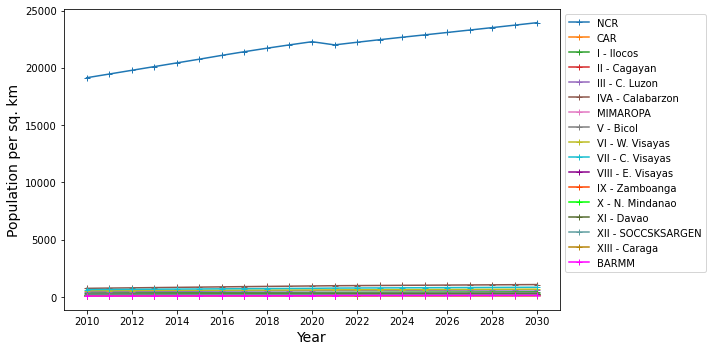

In [19]:
plt.figure(figsize=(10,5))
for i,j in enumerate(regions):
    df_region = df_population[df_population['Region'] == j]
    plt.plot(df_region.year, df_region['population_density'],
             '-+', label=j, color=colors[i] )
        
plt.legend(bbox_to_anchor=[1,1])
plt.xticks(np.arange(2010, 2031, 2))
plt.ylabel('Population per sq. km', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('regional_population_density.png', dpi=300);

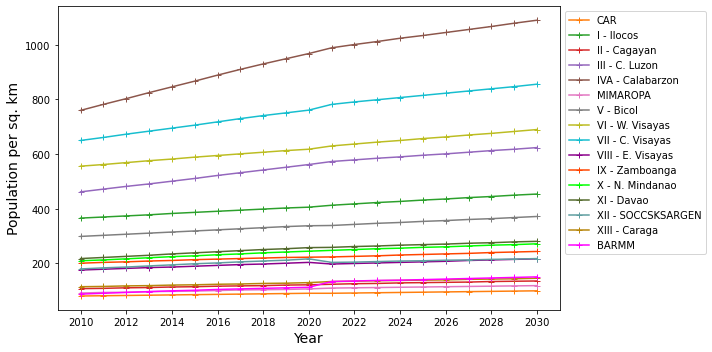

In [20]:
plt.figure(figsize=(10,5))
for i,j in enumerate(regions):
    if j != 'NCR':
        df_region = df_population[df_population['Region'] == j]
        plt.plot(df_region.year, df_region['population_density'],
                 '-+', label=j, color=colors[i] )
        
plt.legend(bbox_to_anchor=[1,1])
plt.xticks(np.arange(2010, 2031, 2))
plt.ylabel('Population per sq. km', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.savefig('regional_population_density.png', dpi=300);

In [21]:
df_population[df_population['year']==2020]

,year,Region,population,area,population_density
10,2020,NCR,13804656,619.54,22282.0
31,2020,CAR,1807738,19818.12,91.0
52,2020,I - Ilocos,5270807,12964.62,406.0
73,2020,II - Cagayan,3657741,29836.88,122.0
94,2020,III - C. Luzon,12313718,21906.19,562.0
115,2020,IVA - Calabarzon,16057299,16576.26,968.0
136,2020,MIMAROPA,3174859,29606.25,107.0
157,2020,V - Bicol,6133836,18114.47,338.0
178,2020,VI - W. Visayas,7904899,12773.46,618.0
199,2020,VII - C. Visayas,7957046,10452.01,761.0


In [22]:
for i, j in zip(df_population[df_population['year']==2020]['population_density'].values,
                df_population[df_population['year']==2020]['Region'].values):
    print(j, (22282/i))

NCR 1.0
CAR 244.85714285714286
I - Ilocos 54.881773399014776
II - Cagayan 182.63934426229508
III - C. Luzon 39.64768683274021
IVA - Calabarzon 23.018595041322314
MIMAROPA 208.2429906542056
V - Bicol 65.92307692307692
VI - W. Visayas 36.055016181229774
VII - C. Visayas 29.279894875164256
VIII - E. Visayas 109.22549019607843
IX - Zamboanga 99.91928251121077
X - N. Mindanao 90.9469387755102
XI - Davao 86.36434108527132
XII - SOCCSKSARGEN 102.68202764976958
XIII - Caraga 171.4
BARMM 197.18584070796462


In [23]:
for i, j in zip(df_population[df_population['year']==2030]['population_density'].values,
                df_population[df_population['year']==2030]['Region'].values):
    print(j, (23947.0/i))

NCR 1.0
CAR 239.47
I - Ilocos 52.74669603524229
II - Cagayan 176.0808823529412
III - C. Luzon 38.37660256410256
IVA - Calabarzon 21.969724770642202
MIMAROPA 201.23529411764707
V - Bicol 64.3736559139785
VI - W. Visayas 34.70579710144928
VII - C. Visayas 27.975467289719628
VIII - E. Visayas 110.35483870967742
IX - Zamboanga 98.14344262295081
X - N. Mindanao 88.0404411764706
XI - Davao 85.22064056939502
XII - SOCCSKSARGEN 109.84862385321101
XIII - Caraga 164.0205479452055
BARMM 158.58940397350995


In [24]:
df_population[df_population['year']==2030].sort_values(by='population_density')

,year,Region,population,area,population_density
41,2030,CAR,1996562,19818.12,100.0
146,2030,MIMAROPA,3538763,29606.25,119.0
83,2030,II - Cagayan,4083515,29836.88,136.0
335,2030,XIII - Caraga,3085948,21120.56,146.0
356,2030,BARMM,5578399,36826.95,151.0
230,2030,VIII - E. Visayas,5057392,23234.78,217.0
314,2030,XII - SOCCSKSARGEN,4934234,22610.08,218.0
251,2030,IX - Zamboanga,4135428,16904.03,244.0
272,2030,X - N. Mindanao,5577604,20458.51,272.0
293,2030,XI - Davao,5760974,20433.38,281.0


# Geospatial plot of Population Density

In [25]:
import geopandas as gpd
import psycopg2
%matplotlib inline

In [26]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

In [27]:
regions = gpd.GeoDataFrame.from_file('Original/Regions.shp')
psgg_code = pd.read_csv('psgg_codes.csv', dtype=object)

In [28]:
regions

,REGION,geometry
0,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4..."
1,Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ..."
2,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ..."
3,Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ..."
4,Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7..."
5,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."
6,Central Visayas (Region VII),"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9..."
7,Cordillera Administrative Region (CAR),"POLYGON ((121.37679 17.95473, 121.36825 17.939..."
8,Davao Region (Region XI),"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5..."
9,Eastern Visayas (Region VIII),"MULTIPOLYGON (((125.07361 9.89472, 125.07333 9..."


In [29]:
df_2030 = df_population[df_population['year']==2030][['Region', 'population_density']]

In [30]:
df_2030.shape

(17, 2)

In [31]:
df_2030['REGION'] = ['Metropolitan Manila', 'Cordillera Administrative Region (CAR)',
                    'Ilocos Region (Region I)', 'Cagayan Valley (Region II)',
                    'Central Luzon (Region III)', 'CALABARZON (Region IV-A)',
                    'MIMAROPA (Region IV-B)', 'Bicol Region (Region V)',
                    'Western Visayas (Region VI)', 'Central Visayas (Region VII)',
                    'Eastern Visayas (Region VIII)', 'Zamboanga Peninsula (Region IX)',
                    'Northern Mindanao (Region X)', 'Davao Region (Region XI)',
                    'SOCCSKSARGEN (Region XII)', 'Caraga (Region XIII)',
                    'Autonomous Region of Muslim Mindanao (ARMM)']

In [32]:
df_2030

,Region,population_density,REGION
20,NCR,23947.0,Metropolitan Manila
41,CAR,100.0,Cordillera Administrative Region (CAR)
62,I - Ilocos,454.0,Ilocos Region (Region I)
83,II - Cagayan,136.0,Cagayan Valley (Region II)
104,III - C. Luzon,624.0,Central Luzon (Region III)
125,IVA - Calabarzon,1090.0,CALABARZON (Region IV-A)
146,MIMAROPA,119.0,MIMAROPA (Region IV-B)
167,V - Bicol,372.0,Bicol Region (Region V)
188,VI - W. Visayas,690.0,Western Visayas (Region VI)
209,VII - C. Visayas,856.0,Central Visayas (Region VII)


In [33]:
df = pd.merge(regions, df_2030, on='REGION')
df

,REGION,geometry,Region,population_density
0,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((119.46694 4.58694, 119.46639 4...",BARMM,151.0
1,Bicol Region (Region V),"MULTIPOLYGON (((122.98417 11.71056, 122.98333 ...",V - Bicol,372.0
2,CALABARZON (Region IV-A),"MULTIPOLYGON (((125.22166 10.43444, 125.22195 ...",IVA - Calabarzon,1090.0
3,Cagayan Valley (Region II),"MULTIPOLYGON (((122.47040 16.91995, 122.47040 ...",II - Cagayan,136.0
4,Caraga (Region XIII),"MULTIPOLYGON (((126.41750 7.96417, 126.41778 7...",XIII - Caraga,146.0
5,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ...",III - C. Luzon,624.0
6,Central Visayas (Region VII),"MULTIPOLYGON (((123.27111 9.08476, 123.27173 9...",VII - C. Visayas,856.0
7,Cordillera Administrative Region (CAR),"POLYGON ((121.37679 17.95473, 121.36825 17.939...",CAR,100.0
8,Davao Region (Region XI),"MULTIPOLYGON (((125.39778 5.43583, 125.39778 5...",XI - Davao,281.0
9,Eastern Visayas (Region VIII),"MULTIPOLYGON (((125.07361 9.89472, 125.07333 9...",VIII - E. Visayas,217.0


In [34]:
df['log_pop_density'] = np.log(df['population_density'])

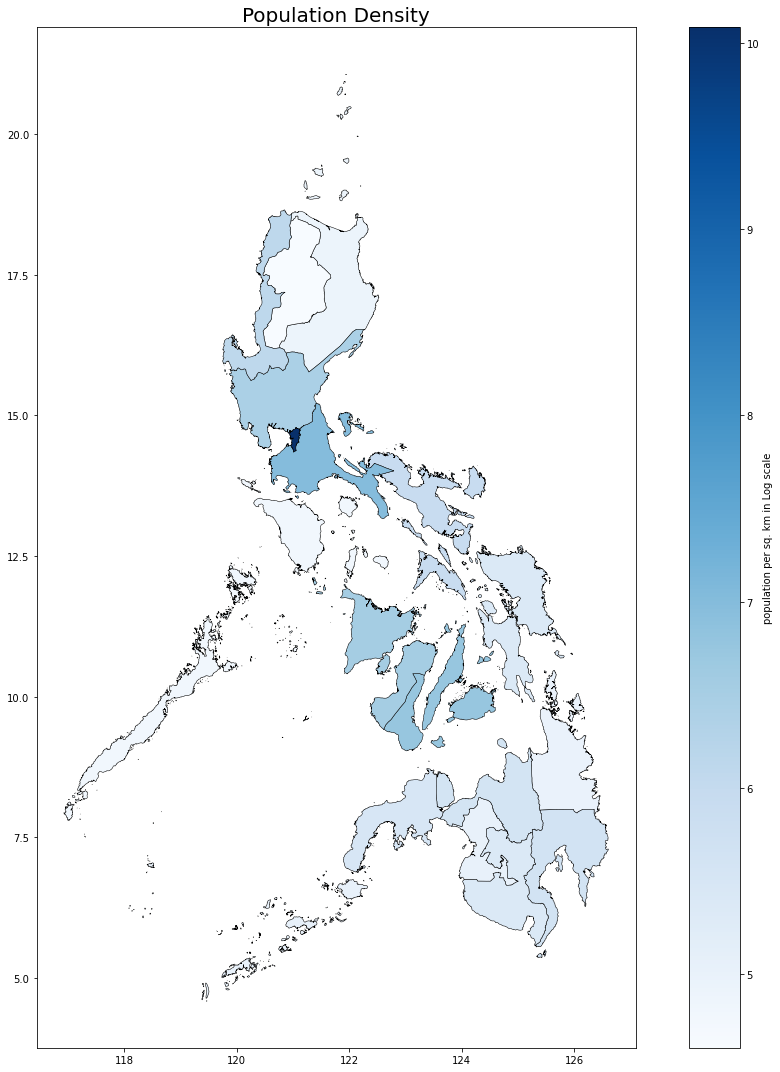

In [35]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
plt.title('Population Density', fontsize=20)
df.plot(column='log_pop_density',
            figsize=(10,10),
            cmap='Blues',
            edgecolor='black',
            linewidth=0.5,
            legend=True,
            legend_kwds = {'label': 'population per sq. km in Log scale'},
             ax=ax)

plt.tight_layout()
plt.savefig('map_population_density.png', dpi=300)

In [36]:
df_population[['year', 'Region','population_density']].to_csv(
   '~/cpt5/capstone/data/processed/regional_population_density_2010_2030.csv')